<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/Dilated_CNN_model_(Multi_step)_for_short_term_power_forecasting_Tested_with_new_CEB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataframe**

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset


**Train an validation data set**

In [2]:
df = pd.read_csv(url9)
df=pd.DataFrame(df)
df

,Date & Time,Average Wind Speed (m/s),Average Wind Dirction (deg),Average Active Power (MW),Forecasted Power (kW)
0,8/1/2021 0:00,10.66,186.92,95.84,100.25
1,8/1/2021 0:10,10.71,188.15,96.03,100.01
2,8/1/2021 0:20,10.53,188.78,93.72,97.12
3,8/1/2021 0:30,10.20,189.80,88.84,96.96
4,8/1/2021 0:40,10.34,193.00,90.97,94.08
...,...,...,...,...,...
4404,8/31/2021 23:20,11.62,195.08,100.45,101.74
4405,8/31/2021 23:30,11.16,196.36,98.01,101.78
4406,8/31/2021 23:40,10.66,198.02,93.11,101.85
4407,8/31/2021 23:50,10.90,196.96,93.68,101.29


**Rename column names**

In [3]:
col_1=(df.columns)[0]
col_2=(df.columns)[3]
feature = 'Active Power'
df.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)
df


,Date & Time,Average Wind Speed (m/s),Average Wind Dirction (deg),Active Power,Forecasted Power (kW)
0,8/1/2021 0:00,10.66,186.92,95.84,100.25
1,8/1/2021 0:10,10.71,188.15,96.03,100.01
2,8/1/2021 0:20,10.53,188.78,93.72,97.12
3,8/1/2021 0:30,10.20,189.80,88.84,96.96
4,8/1/2021 0:40,10.34,193.00,90.97,94.08
...,...,...,...,...,...
4404,8/31/2021 23:20,11.62,195.08,100.45,101.74
4405,8/31/2021 23:30,11.16,196.36,98.01,101.78
4406,8/31/2021 23:40,10.66,198.02,93.11,101.85
4407,8/31/2021 23:50,10.90,196.96,93.68,101.29


**Set Data & Time as index**

In [4]:
df=df.set_index('Date & Time')
df

,Average Wind Speed (m/s),Average Wind Dirction (deg),Active Power,Forecasted Power (kW)
Date & Time,,,,
8/1/2021 0:00,10.66,186.92,95.84,100.25
8/1/2021 0:10,10.71,188.15,96.03,100.01
8/1/2021 0:20,10.53,188.78,93.72,97.12
8/1/2021 0:30,10.20,189.80,88.84,96.96
8/1/2021 0:40,10.34,193.00,90.97,94.08
...,...,...,...,...
8/31/2021 23:20,11.62,195.08,100.45,101.74
8/31/2021 23:30,11.16,196.36,98.01,101.78
8/31/2021 23:40,10.66,198.02,93.11,101.85


**Divide train and validation sets**

In [5]:
L=len(df)
valid_start=int(18*L/20)
train,valid=df[:valid_start],df[valid_start:]

print(train.shape)
print(valid.shape)


print(train.describe())
print(valid.describe())


(3968, 4)
(441, 4)
       Average  Wind Speed (m/s)   Average  Wind Dirction (deg)   \
count                   3,968.00                        3,968.00   
mean                        9.88                          196.16   
std                         2.65                           13.74   
min                         1.81                          130.84   
25%                         8.07                          188.48   
50%                        10.00                          194.03   
75%                        11.88                          202.26   
max                        15.88                          311.14   

       Active Power   Forecasted Power (kW)   
count      3,968.00                 3,968.00  
mean          71.39                    70.69  
std           31.76                    29.82  
min           -0.76                     1.83  
25%           45.82                    43.72  
50%           83.40                    76.94  
75%          100.97                   1

# **Data preparation**

In [6]:
T = 10
HORIZON = 3

In [7]:
scaler = MinMaxScaler()
train=pd.DataFrame(train[feature])
train[feature] = scaler.fit_transform(train)

train_shifted = train.copy()



In [8]:
for i in range(1,HORIZON+1):
  train_shifted['y_t+'+str(i)] = train_shifted[feature].shift(-i)
train_shifted.head(10)

,Active Power,y_t+1,y_t+2,y_t+3
Date & Time,,,,
8/1/2021 0:00,0.93,0.93,0.91,0.86
8/1/2021 0:10,0.93,0.91,0.86,0.88
8/1/2021 0:20,0.91,0.86,0.88,0.90
8/1/2021 0:30,0.86,0.88,0.90,0.91
8/1/2021 0:40,0.88,0.90,0.91,0.94
8/1/2021 0:50,0.90,0.91,0.94,0.94
8/1/2021 1:00,0.91,0.94,0.94,0.92
8/1/2021 1:10,0.94,0.94,0.92,0.93
8/1/2021 1:20,0.94,0.92,0.93,0.94


**Creating input data to model (Getting T lagged vaules)**

In [9]:
for t in range(1, T+1):
    train_shifted['active_power_t-'+str(T-t)] = train_shifted[feature].shift(T-t)
train_shifted = train_shifted.rename(columns={feature:'Original_active_power'})

# 4.Discard any samples with missing values
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(10)

,Original_active_power,y_t+1,y_t+2,y_t+3,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,
8/1/2021 1:30,0.92,0.93,0.94,0.95,0.93,0.93,0.91,0.86,0.88,0.90,0.91,0.94,0.94,0.92
8/1/2021 1:40,0.93,0.94,0.95,0.97,0.93,0.91,0.86,0.88,0.90,0.91,0.94,0.94,0.92,0.93
8/1/2021 1:50,0.94,0.95,0.97,0.97,0.91,0.86,0.88,0.90,0.91,0.94,0.94,0.92,0.93,0.94
8/1/2021 2:00,0.95,0.97,0.97,0.97,0.86,0.88,0.90,0.91,0.94,0.94,0.92,0.93,0.94,0.95
8/1/2021 2:10,0.97,0.97,0.97,0.93,0.88,0.90,0.91,0.94,0.94,0.92,0.93,0.94,0.95,0.97
8/1/2021 2:20,0.97,0.97,0.93,0.90,0.90,0.91,0.94,0.94,0.92,0.93,0.94,0.95,0.97,0.97
8/1/2021 2:30,0.97,0.93,0.90,0.89,0.91,0.94,0.94,0.92,0.93,0.94,0.95,0.97,0.97,0.97
8/1/2021 2:40,0.93,0.90,0.89,0.87,0.94,0.94,0.92,0.93,0.94,0.95,0.97,0.97,0.97,0.93
8/1/2021 2:50,0.90,0.89,0.87,0.85,0.94,0.92,0.93,0.94,0.95,0.97,0.97,0.97,0.93,0.90


**Train input and target arrays**

In [10]:
y_train = np.array(train_shifted[['y_t+'+str(i) for i in range(1,HORIZON+1)]])
X_train=np.array(train_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [11]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], T, 1)

In [12]:
print(y_train.shape)
print(X_train.shape)

(3956, 3)
(3956, 10, 1)


**Data preparation - Validation data**

In [13]:
valid=pd.DataFrame(valid[feature])
valid_new=df[valid_start-T+1:] #Add T values beforehand to the validation set
valid_new=pd.DataFrame(valid_new[feature])
valid_new.head(20)

,Active Power
Date & Time,
8/28/2021 21:10,102.70
8/28/2021 21:20,102.82
8/28/2021 21:30,102.84
8/28/2021 21:40,102.99
8/28/2021 21:50,102.77
8/28/2021 22:00,102.55
8/28/2021 22:10,102.22
8/28/2021 22:20,101.85
8/28/2021 22:30,101.72


In [14]:
valid_new[feature]=scaler.transform(valid_new)

#Validataion set preparation(Lagged values,create input and target arrays,reshape)]

valid_shifted = valid_new.copy() 
for i in range(1,HORIZON+1):
  valid_shifted['y_t+'+str(i)] = valid_shifted[feature].shift(-i)
valid_shifted.head(10)

for t in range(1, T+1):
    valid_shifted['active_power_t-'+str(T-t)] = valid_shifted[feature].shift(T-t)
vali_shifted = valid_shifted.rename(columns={feature:'Original_active_power'})

valid_shifted = valid_shifted.dropna(how='any')

y_valid = np.array(valid_shifted[["y_t+"+str(i) for i in range(1,HORIZON+1)]])
X_valid=np.array(valid_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

In [15]:
print(y_valid.shape)
print(X_valid.shape)

(438, 3)
(438, 10, 1)


# **Implement the GRU-RNN**

In [16]:
from keras.models import Model, Sequential
from keras.layers import Conv1D, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
LATENT_DIM = 12
KERNEL_SIZE = 2
BATCH_SIZE = 32
EPOCHS = 50

In [18]:
model = Sequential()
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=1, input_shape=(T, 1)))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=2))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=4))
#model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=8))
model.add(Flatten())
model.add(Dense(HORIZON, activation='linear'))

In [19]:
model.compile(optimizer='Adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 12)            36        
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 12)            300       
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 12)            300       
                                                                 
 flatten (Flatten)           (None, 120)               0         
                                                                 
 dense (Dense)               (None, 3)                 363       
                                                                 
Total params: 999
Trainable params: 999
Non-trainable params: 0
_________________________________________________________________


In [20]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
best_val = ModelCheckpoint('model_{epoch:02d}.h5', save_best_only=True, mode='min', period=1)

In [21]:
history = model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop, best_val],
          verbose=1)

Epoch 1/50
124/124 [==============================] - 1s 5ms/step - loss: 0.0850 - val_loss: 0.0123
Epoch 2/50
124/124 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 3/50
124/124 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0075
Epoch 4/50
124/124 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0068
Epoch 5/50
124/124 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0064
Epoch 6/50
124/124 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 7/50
124/124 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0061
Epoch 8/50
124/124 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0057
Epoch 9/50
124/124 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0054
Epoch 10/50
124/124 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0056

In [22]:
best_epoch = np.argmin(np.array(history.history['val_loss']))+1
model.load_weights("model_{:02d}.h5".format(best_epoch))

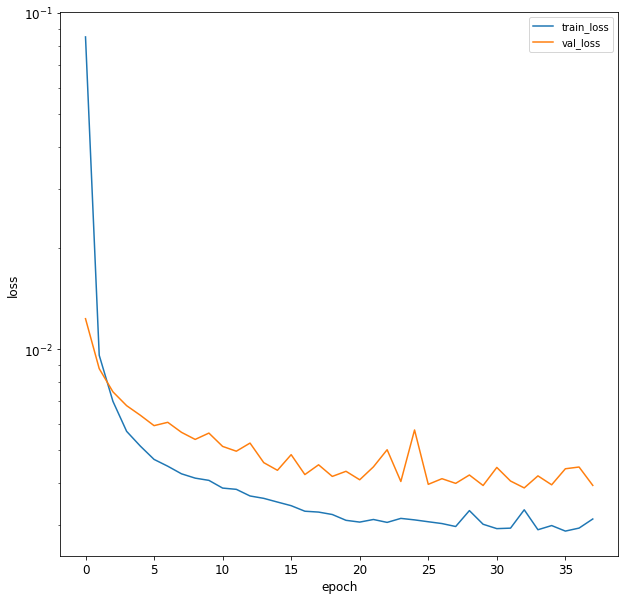

In [23]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

# **Evaluate the model**

**Load test data set**

In [24]:
df_test = pd.read_csv(url11)
df_test=pd.DataFrame(df_test)

In [25]:
df_test=df_test.drop(0)
df_test=df_test.head(200)

In [26]:
#df_test

In [27]:
col_1=(df_test.columns)[0]
col_2=(df_test.columns)[1]
feature = 'Active Power'
df_test.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)

In [28]:
for i in range(HORIZON):
  col=(df_test.columns)[i+2]
  df_test.rename(columns={col :'Forecasted power t+'+str(i+1)},inplace=True)

In [29]:
df_test=df_test.set_index('Date & Time')
df_test = df_test.apply(pd.to_numeric)
df_test=df_test.div(1000)

In [30]:
#df_test.head(20)

In [31]:
scaler = MinMaxScaler()
test=pd.DataFrame(df_test[feature])
test[feature] = scaler.fit_transform(test)
#test


In [32]:
test_shifted = test.copy()
for i in range(1,HORIZON+1):
  test_shifted['y_t+'+str(i)] = test_shifted[feature].shift(-i)

for t in range(1, T+1):
    test_shifted['active_power_t-'+str(T-t)] = test_shifted[feature].shift(T-t)
test_shifted = test_shifted.rename(columns={feature:'Original_active_power'})

X_train=np.array(train_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

for i in range(1,HORIZON+1):
  forecasted_values=np.array(df_test['Forecasted power t+'+str(i)])
  test_shifted['Forecasted power t+'+str(i)] = forecasted_values
#test_shifted

In [33]:
#test_shifted.head(20)

In [34]:
test_shifted = test_shifted.dropna(how='any')
y_test = np.array(test_shifted[['y_t+'+str(i) for i in range(1,HORIZON+1)]])
#y_test = np.array(test_shifted['Original_active_power'])
X_test=np.array(test_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], T, 1)
#X_test

In [35]:
#test_shifted

In [36]:
print(y_test.shape)
print(X_test.shape)

(188, 3)
(188, 10, 1)


In [37]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
#predictions

In [38]:
#predictions[0]

In [39]:
x = pd.DataFrame()
x['Date & Time'] = test_shifted.index
x['Original output power']= np.array(test_shifted['Original_active_power'])
x['Original output power']=scaler.inverse_transform(np.array(x[['Original output power']]))
for i in range(1,HORIZON+1):
  x['predictions t+'+str(i)]=predictions[i-1]
  x[['predictions t+'+str(i)]]=scaler.inverse_transform(np.array(x[['predictions t+'+str(i)]]))
  x['actual t+'+str(i)]=pd.DataFrame(y_test)[i-1]
  x[['actual t+'+str(i)]]=scaler.inverse_transform(np.array(x[['actual t+'+str(i)]]))
  x['forecasted t+'+str(i)]=np.array(test_shifted[['Forecasted power t+'+str(i)]])
x

,Date & Time,Original output power,predictions t+1,actual t+1,forecasted t+1,predictions t+2,actual t+2,forecasted t+2,predictions t+3,actual t+3,forecasted t+3
0,9/1/2021 1:30,98.35,98.32,98.33,99.40,98.11,98.34,99.54,97.64,98.26,99.68
1,9/1/2021 1:40,98.33,98.03,98.34,99.54,97.93,98.26,99.68,97.64,98.35,99.81
2,9/1/2021 1:50,98.34,98.20,98.26,99.42,98.06,98.35,99.57,97.63,98.26,99.71
3,9/1/2021 2:00,98.26,98.16,98.35,99.57,97.97,98.26,99.71,97.68,98.33,99.84
4,9/1/2021 2:10,98.35,98.29,98.26,99.71,98.07,98.33,99.83,97.79,98.36,99.96
...,...,...,...,...,...,...,...,...,...,...,...
183,9/2/2021 8:00,47.23,47.60,42.07,21.34,48.54,40.83,20.24,49.13,41.44,19.14
184,9/2/2021 8:10,42.07,41.29,40.83,20.24,40.98,41.44,19.14,41.50,40.85,18.04
185,9/2/2021 8:20,40.83,39.54,41.44,19.14,39.16,40.85,18.04,39.43,40.25,16.92
186,9/2/2021 8:30,41.44,40.98,40.85,18.04,42.34,40.25,16.92,42.04,39.85,15.84


In [40]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

for i in range(1,HORIZON+1):
  actual = x['actual t+1']
  pred = x['predictions t+'+str(i)]
  forecast = x['forecasted t+'+str(i)]
  mape_value_our=mape(actual, pred)
  mape_value_forecast=mape(actual, forecast)
  print('Dilated CNN Model: MAPE for t+'+str(i)+'= '+str(mape_value_our))
  print('CEB Model: MAPE for t+'+str(i)+'= '+str(mape_value_forecast))


Dilated CNN Model: MAPE for t+1= 6.9798971340388425
CEB Model: MAPE for t+1= 24.409273651826485
Dilated CNN Model: MAPE for t+2= 7.5120575555284965
CEB Model: MAPE for t+2= 25.66099501264067
Dilated CNN Model: MAPE for t+3= 7.403985058510987
CEB Model: MAPE for t+3= 26.843703410500012


In [41]:
def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

for i in range(1,HORIZON+1):
  actual = x['actual t+1']
  pred = x['predictions t+'+str(i)]
  forecast = x['forecasted t+'+str(i)]
  rmse_value_our=rmse(actual, pred)
  rmse_value_forecast=rmse(actual, forecast)
  print('Dilated CNN Model: RMSE for t+'+str(i)+'= '+str(rmse_value_our))
  print('CEB Model: RMSE for t+'+str(i)+'= '+str(rmse_value_forecast))


Dilated CNN Model: RMSE for t+1= 5.20663883571143
CEB Model: RMSE for t+1= 15.688350881622817
Dilated CNN Model: RMSE for t+2= 5.3894862196238424
CEB Model: RMSE for t+2= 16.232180175513566
Dilated CNN Model: RMSE for t+3= 5.27213471796657
CEB Model: RMSE for t+3= 16.781584438944748


# **Plots**

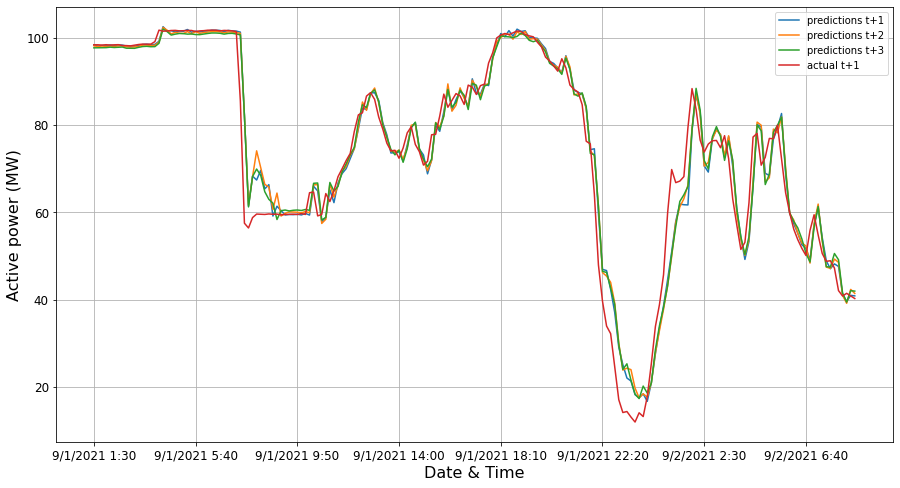

In [42]:
x.plot(x='Date & Time', y=['predictions t+1','predictions t+2','predictions t+3','actual t+1'],fontsize=12, figsize=(15, 8))
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.show()

In [43]:
l=["predictions t+"+str(i) for i in range(1,HORIZON+1)]
l

['predictions t+1', 'predictions t+2', 'predictions t+3']

In [44]:
for i in range(1,HORIZON):
  fig1 = px.line(x,x='Date & Time', y=['predictions t+'+str(i) ,'actual t+'+str(i)],labels={ "value": 'Active power (MW)'},title="GRU model-multiatep:Expected vs predicted power forecasting => t+"+str(i)) 
  fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
  fig1.show()

In [45]:
for i in range(1,HORIZON):
  fig1 = px.line(x,x='Date & Time', y=['forecasted t+'+str(i) ,'actual t+'+str(i)],labels={ "value": 'Active power (MW)'},title="GRU model-multiatep:Expected vs forecasted(CEB) power forecasting => t+"+str(i)) 
  fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
  fig1.show()

In [46]:
for i in range(1,HORIZON+1):
  fig1 = px.line(x,x='Date & Time', y=['predictions t+'+str(i) ,'actual t+'+str(i),'forecasted t+'+str(i)],labels={ "value": 'Active power (MW)'},title="Dilated CNN-multistep model:Comparison with CEB multistep power forecasting => t+"+str(i)) 
  fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
  fig1.show()

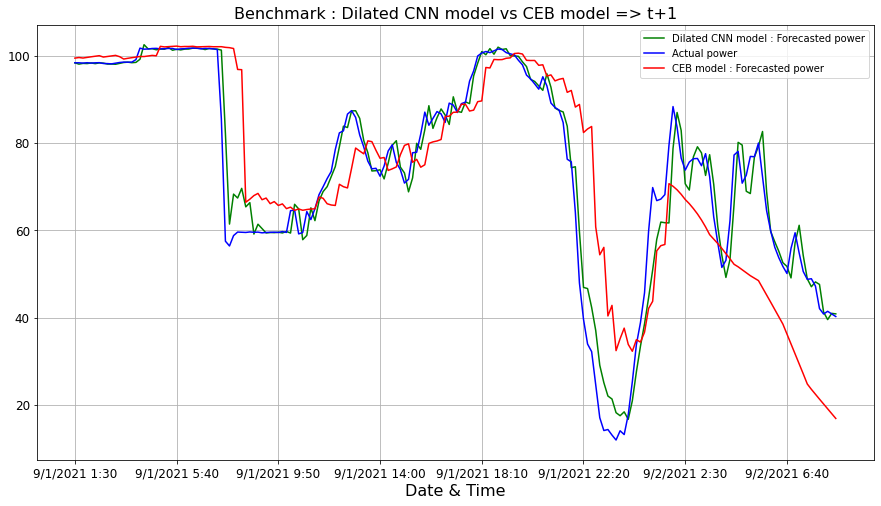

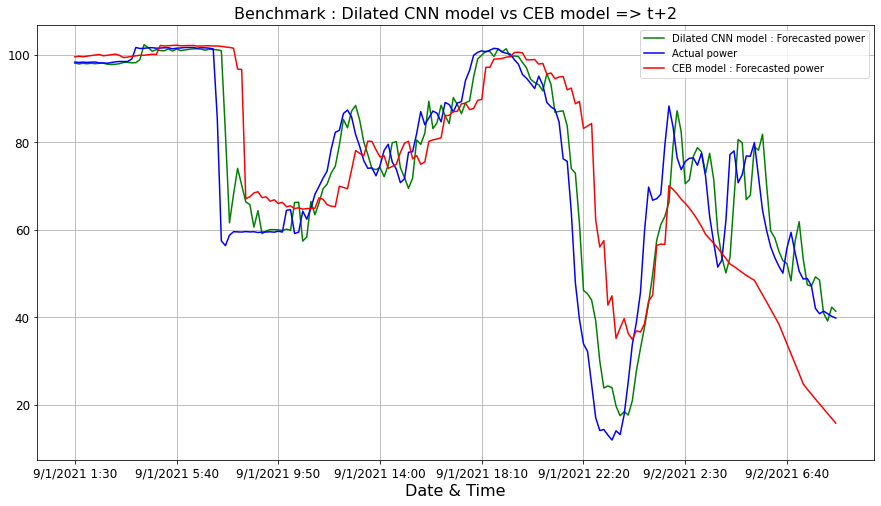

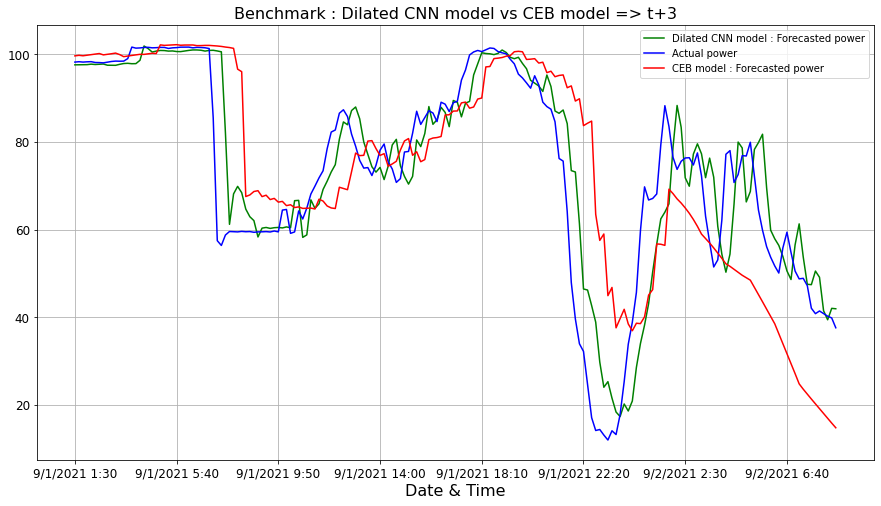

In [50]:
for i in range(1,HORIZON+1):
  x.plot(x='Date & Time', y=['predictions t+'+str(i),'actual t+'+str(i),'forecasted t+'+str(i)], style=['g','b','r'],fontsize=12, figsize=(15, 8))
  plt.title("Benchmark : Dilated CNN model vs CEB model => t+"+str(i),fontsize=16)
  plt.xlabel('Date & Time', fontsize=16)
  plt.legend(['Dilated CNN model : Forecasted power', 'Actual power','CEB model : Forecasted power'])
  plt.grid()
  plt.savefig("benchmark.png")
  plt.show()

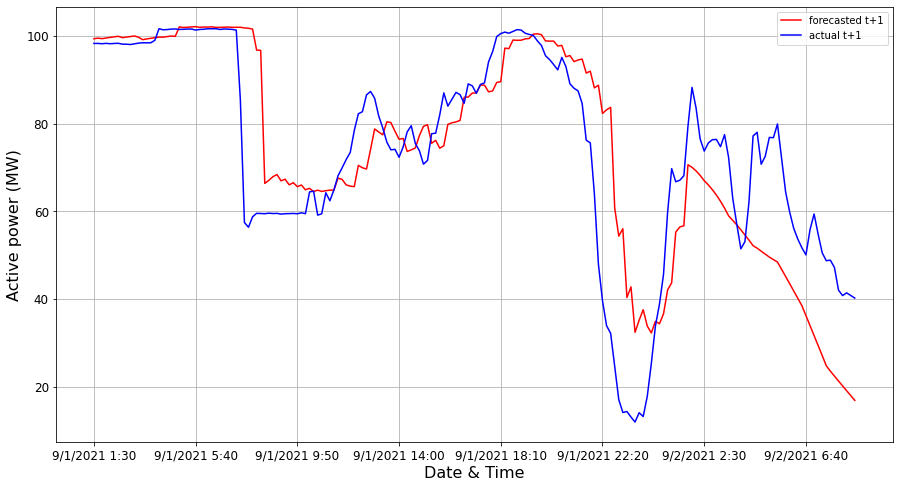

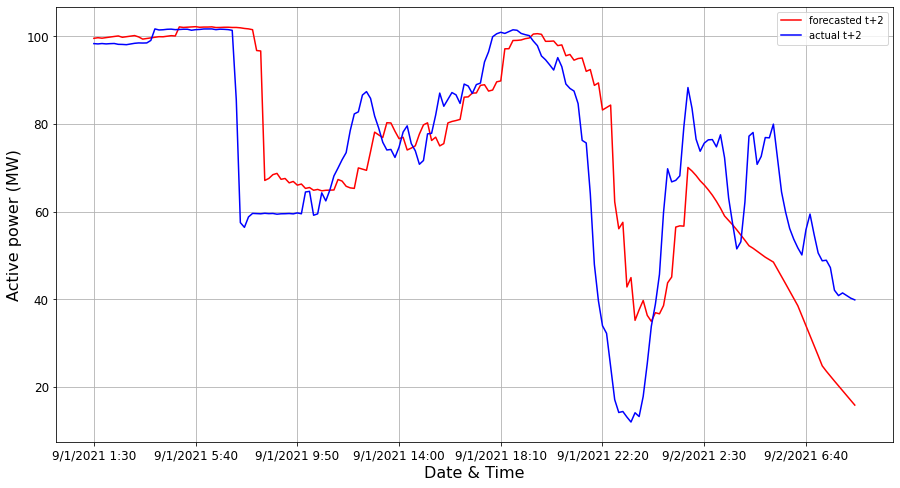

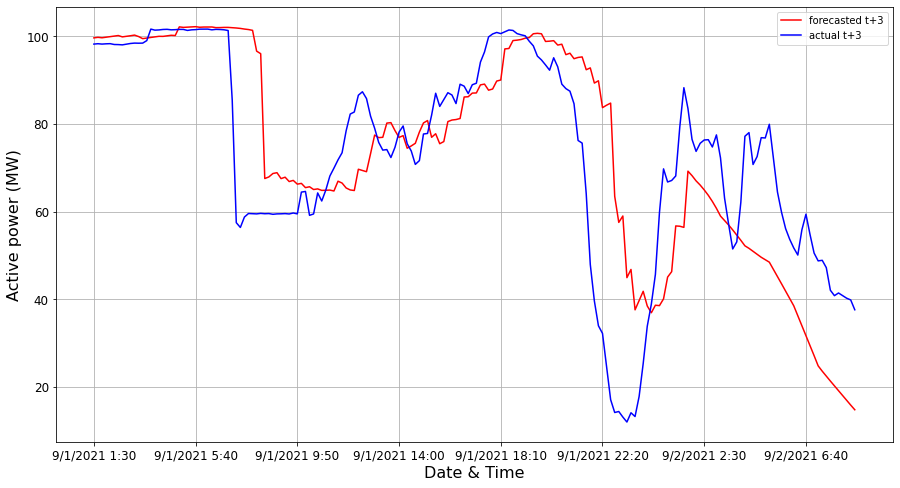

In [48]:
for i in range(1,HORIZON+1):
  x.plot(x='Date & Time', y=['forecasted t+'+str(i), 'actual t+'+str(i)], style=['r', 'b'],fontsize=12, figsize=(15, 8))
  plt.xlabel('Date & Time', fontsize=16)
  plt.ylabel('Active power (MW)', fontsize=16)
  plt.grid()
  plt.show()